In [1]:
import sys,os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

base_color = sns.color_palette()[0]

# Designing the Perfect IT Company
## An exploration analysis on Stack Overflow’s 2020 survey

Part 2 - Exploratory Data Analysis

## Load Data

In [2]:
df_schema = pd.read_csv("../data/processed/so_schema.csv")
df_schema.head()

,field,question_text
0,respondent,Randomized respondent ID number (not in order ...
1,main_branch,Which of the following options best describes ...
2,hobbyist,Do you code as a hobby?
3,age,What is your age (in years)? If you prefer not...
4,age1st_code,At what age did you write your first line of c...


In [3]:
df = pd.read_csv("../data/processed/so_data.csv")
df.head()

,respondent,main_branch,hobbyist,age,age1st_code,comp_freq,comp_total,converted_comp,country,currency_desc,...,survey_ease,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   respondent                         64461 non-null  int64  
 1   main_branch                        64162 non-null  object 
 2   hobbyist                           64416 non-null  object 
 3   age                                45446 non-null  float64
 4   age1st_code                        57900 non-null  object 
 5   comp_freq                          40069 non-null  object 
 6   comp_total                         34826 non-null  float64
 7   converted_comp                     34756 non-null  float64
 8   country                            64072 non-null  object 
 9   currency_desc                      45472 non-null  object 
 10  currency_symbol                    45472 non-null  object 
 11  database_desire_next_year          44070 non-null  obj

In [5]:
df.country.value_counts()

United States       12469
India                8403
United Kingdom       3896
Germany              3890
Canada               2191
                    ...  
Kiribati                1
Nauru                   1
Lesotho                 1
Saint Lucia             1
Marshall Islands        1
Name: country, Length: 183, dtype: int64

## Q1: What do the developers look for a company?


### Examine Job Satisfaction

In [6]:
sat_type = CategoricalDtype(categories=["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"], ordered=True)
df.job_sat = df.job_sat.astype(sat_type)

df.job_sat.dtype

CategoricalDtype(categories=['Very satisfied', 'Slightly satisfied',
                  'Neither satisfied nor dissatisfied',
                  'Slightly dissatisfied', 'Very dissatisfied'],
, ordered=True)

In [7]:
df.job_sat.value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: job_sat, dtype: int64

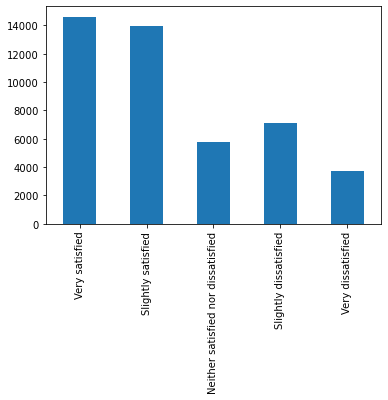

In [8]:
df.job_sat.value_counts().sort_index().plot(kind='bar');

> Majority of the respondents are somewhat satisfied with their current job.

### Explore Null Job Satisfaction

In [9]:
missing_js = df.job_sat.isnull().sum()
print(f"{missing_js} missing values for Job Satisfaction")

19267 missing values for Job Satisfaction


In [10]:
df[df.job_sat.isnull()][["job_sat","dev_type", "job_factors", "job_seek", "employment"]]

,job_sat,dev_type,job_factors,job_seek,employment
2,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Employed full-time
14,NaN,NaN,"Languages, frameworks, and other technologies ...","I’m not actively looking, but I am open to new...",Student
20,NaN,NaN,"Languages, frameworks, and other technologies ...","I’m not actively looking, but I am open to new...",Student
26,NaN,"Database administrator;Developer, full-stack;E...",NaN,NaN,Employed full-time
...,...,...,...,...,...
64456,NaN,Senior executive/VP,NaN,NaN,Employed full-time
64457,NaN,NaN,NaN,NaN,Employed full-time
64458,NaN,NaN,NaN,NaN,NaN
64459,NaN,NaN,NaN,NaN,Employed full-time


In [11]:
df.employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: employment, dtype: int64

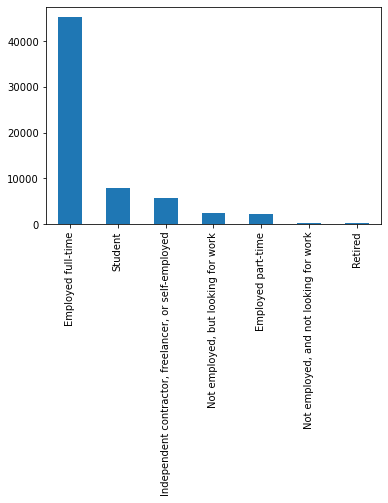

In [12]:
df.employment.value_counts().plot(kind='bar');

> Big amount of respondents are employed fulltime.

**Explore Null Job Satisfaction for Currently Not Employed**

In [13]:
unemployed = len(df[df.job_sat.notnull() & df.employment.isin(["Not employed, and not looking for work", "Student", "Not employed, but looking for work", "Retired"])])

print(f"{unemployed} - Number of unemployed with Job Satisfaction")

0 - Number of unemployed with Job Satisfaction


### Seeking Job Factors

**Investigate Job Seeking Status**

In [14]:
df.job_seek.value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: job_seek, dtype: int64

In [15]:
df[["job_seek", "job_sat"]].dropna()

,job_seek,job_sat
0,I am not interested in new job opportunities,Slightly satisfied
1,I am not interested in new job opportunities,Very dissatisfied
3,"I’m not actively looking, but I am open to new...",Slightly dissatisfied
5,I am not interested in new job opportunities,Slightly satisfied
6,"I’m not actively looking, but I am open to new...",Very satisfied
...,...,...
64114,I am not interested in new job opportunities,Very satisfied
64146,I am not interested in new job opportunities,Very satisfied
64148,I am not interested in new job opportunities,Slightly satisfied
64152,"I’m not actively looking, but I am open to new...",Very satisfied


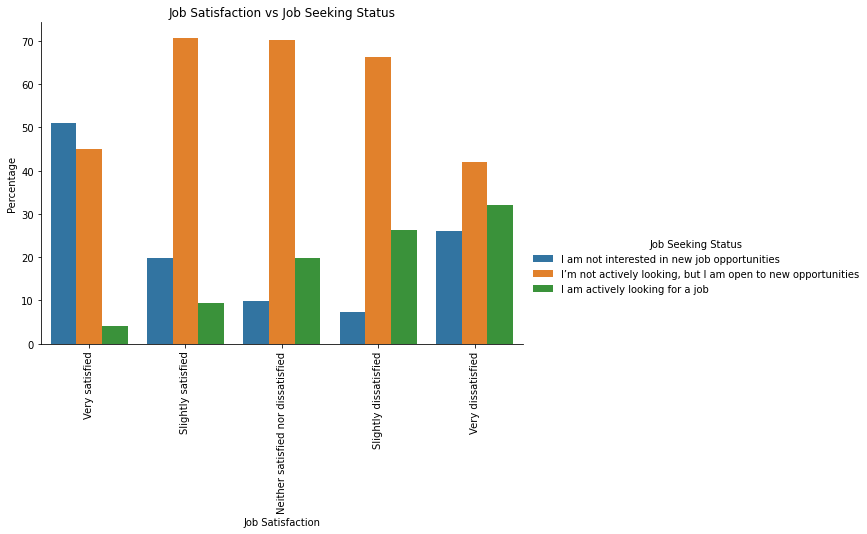

In [16]:
seek_sat = df[["job_seek", "job_sat"]].dropna()

x,y = 'job_sat', 'job_seek'

seek_g = count_percentage(x, y, seek_sat)

g = sns.catplot(x = x, y = "percent", hue = y, kind="bar", aspect=1.5, data = seek_g)
g.set(xlabel = "Job Satisfaction", ylabel = "Percentage", title = "Job Satisfaction vs Job Seeking Status")
g._legend.set_title("Job Seeking Status")
g.set_xticklabels(rotation=90);

> The graph shows that only very satisfied respondents has more commitment to their current job.

**Check Job Factors**

In [17]:
factors = df[["employment", "job_factors"]].dropna()
factors["job_factors"] = factors.job_factors.str.split(";")
factors.head()

,employment,job_factors
0,"Independent contractor, freelancer, or self-em...","[Languages, frameworks, and other technologies..."
5,Employed full-time,"[Diversity of the company or organization, Lan..."
7,Employed full-time,"[Remote work options, Opportunities for profes..."
8,"Independent contractor, freelancer, or self-em...","[Diversity of the company or organization, Rem..."
9,Employed full-time,"[Flex time or a flexible schedule, How widely ..."


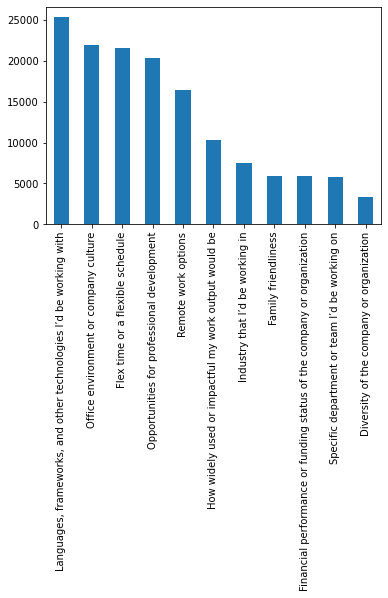

In [18]:
factors_exp = factors.explode("job_factors")
factors_exp.job_factors.value_counts().plot(kind="bar");

> Languages/frameworks and other technologies tops the job factors

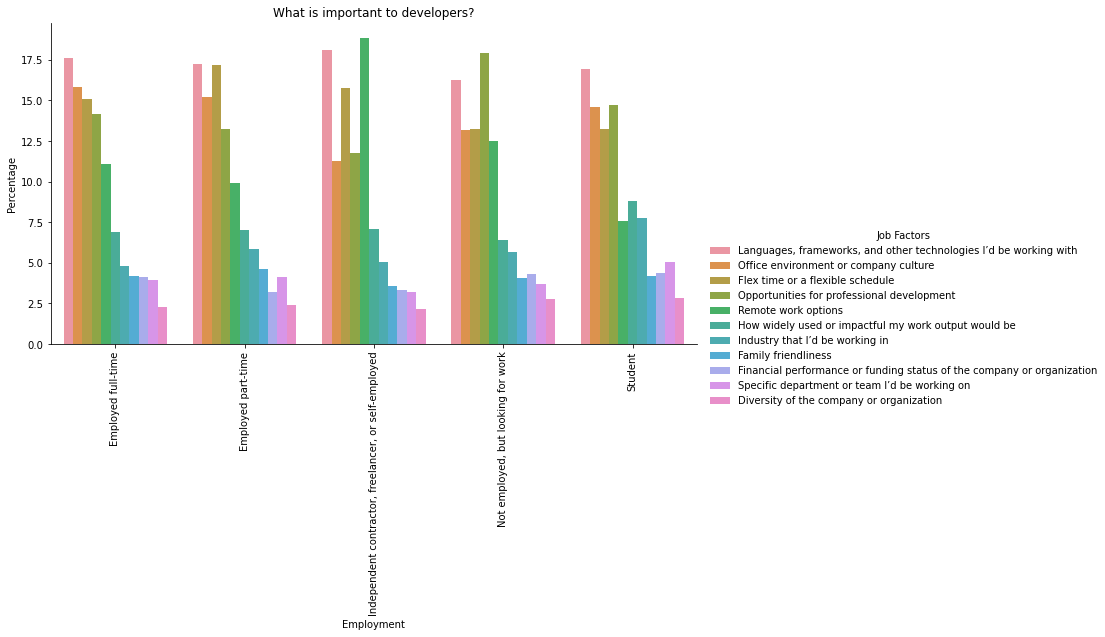

In [19]:
x,y = 'employment', 'job_factors'

factors_g = count_percentage(x, y, factors_exp)

g = sns.catplot(x = x, y = "percent", hue = y, kind="bar", aspect = 2, data = factors_g)
g.set(xlabel = "Employment", ylabel = "Percentage", title = "What is important to developers?")
g._legend.set_title("Job Factors")
g.set_xticklabels(rotation=90);

> Top 5
> * Languages/Frameworks/Technologies
> * Office environment and company culture
> * Flexible Time
> * Opportunities for professional development
> * Remote work options
>
> Independent contractors stress importance to remote work options
> 
> Part-timers also stressed importance on flexible schedule

**Explore New Work Driver**

In [20]:
job_hunt = df[["employment", "new_job_hunt"]].dropna()
job_hunt["new_job_hunt"] = job_hunt.new_job_hunt.str.split(";")

job_hunt.head()

,employment,new_job_hunt
6,Employed full-time,"[Better compensation, Growth or leadership opp..."
7,Employed full-time,"[Curious about other opportunities, Better com..."
8,"Independent contractor, freelancer, or self-em...","[Curious about other opportunities, Growth or ..."
9,Employed full-time,"[Curious about other opportunities, Better com..."
10,Employed full-time,"[Curious about other opportunities, Better com..."


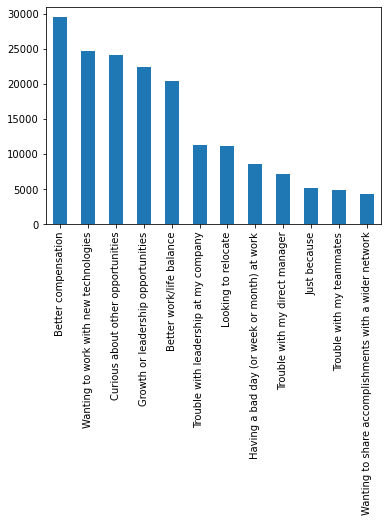

In [21]:
job_hunt_exp = job_hunt.explode("new_job_hunt")
job_hunt_exp.new_job_hunt.value_counts().plot(kind="bar");

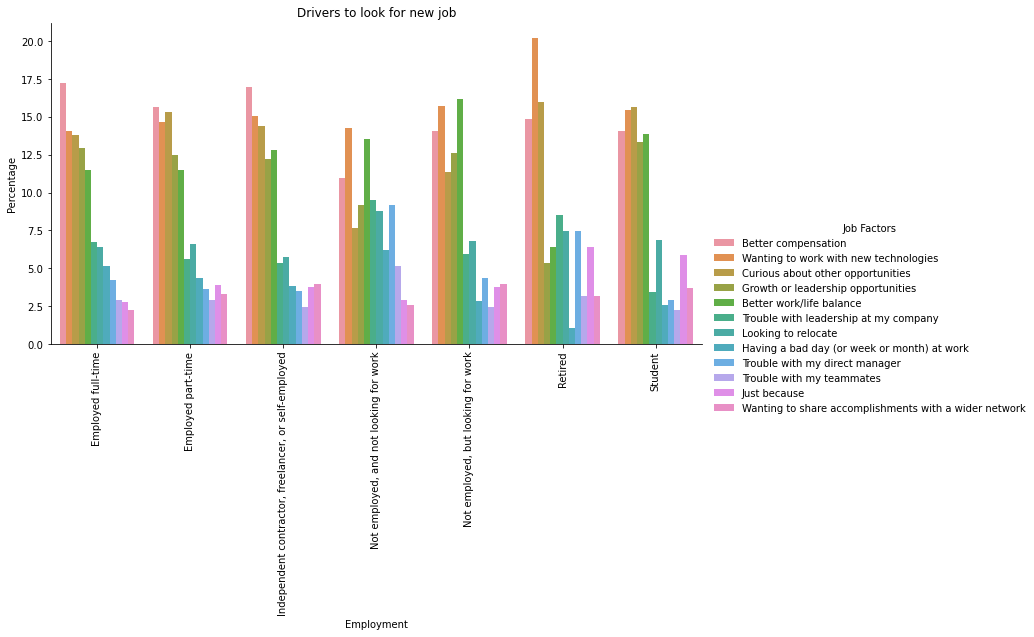

In [22]:
x,y = 'employment', 'new_job_hunt'

job_hunt_g = count_percentage(x, y, job_hunt_exp)

g = sns.catplot(x = x, y = "percent", hue = y, kind="bar", aspect = 2, data = job_hunt_g)
g.set(xlabel = "Employment", ylabel = "Percentage", title = "Drivers to look for new job")
g._legend.set_title("Job Factors")
g.set_xticklabels(rotation=90);

> Hunting for new job factors top 5
> * Better compensation
> * New technologies
> * Opportunities
> * Growth and Leadership Opportunities
> * Work/Life balance
>
> Currently not employed/part timers/freelancers are looking for a better work/life balance
>
> Students values opportunities and new technologies
>
> Even retired, they still want to work on new technologies 

**Quick Explore Job Learning Method**

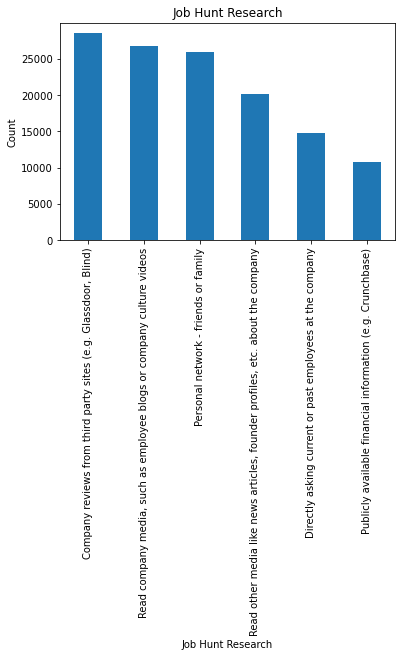

In [23]:
g = df.new_job_hunt_research.dropna().str.split(";").explode().value_counts().plot(kind="bar")
g.set(xlabel = "Job Hunt Research", ylabel = "Count", title = "Job Hunt Research");

## Q2: Is salary or languages/technologies/frameworks effective enough to solve job satisfaction issues?


**Explore Salary**

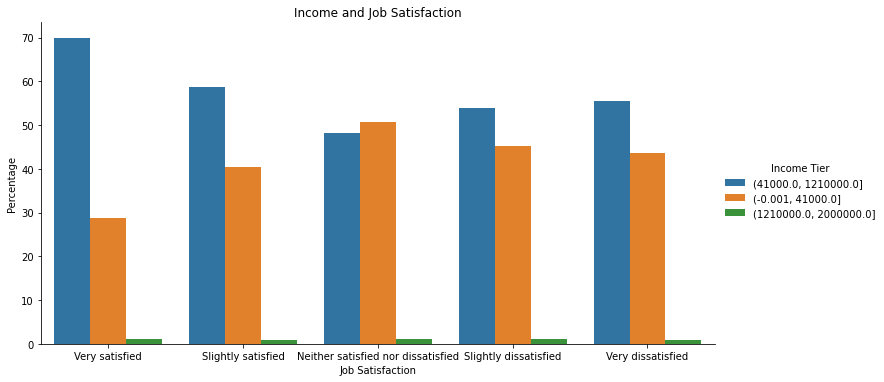

In [24]:
salary = df[["job_sat", "converted_comp"]].dropna()

# bins are based on US 2020 Income Tiers (Low, Middle, High Class)
salary_g = salary.groupby("job_sat")["converted_comp"].value_counts(bins=[0.0, 41000.0, 1210000.0, 2000000.0],  normalize=True).mul(100).rename("percent").reset_index()

g = sns.catplot(x="job_sat", y="percent", hue="converted_comp", kind="bar", aspect=2, data=salary_g)
g.set(xlabel = "Job Satisfaction", ylabel = "Percentage", title = "Income and Job Satisfaction")
g._legend.set_title("Income Tier")

> It shows that satisfied respondents has a higher gap between middle and low income class
> 
> However, even well compensated respondents are evenly distributed on different satisfaction level

**Explore Languages/Frameworks/Techs**

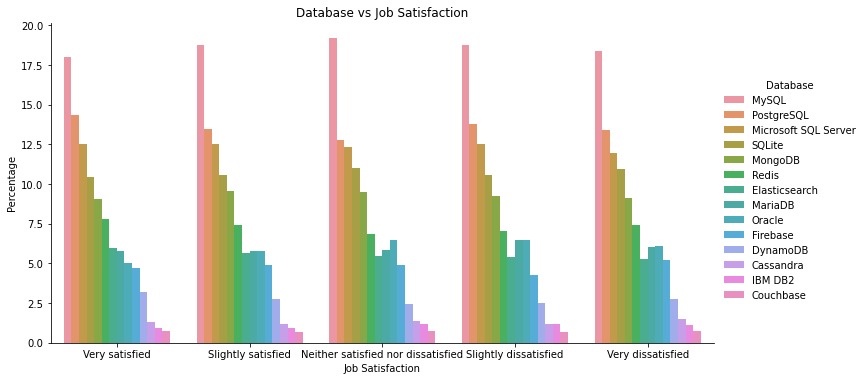

In [25]:
plot_cat("job_sat", "database_worked_with", df, title="Database vs Job Satisfaction", label="Database");

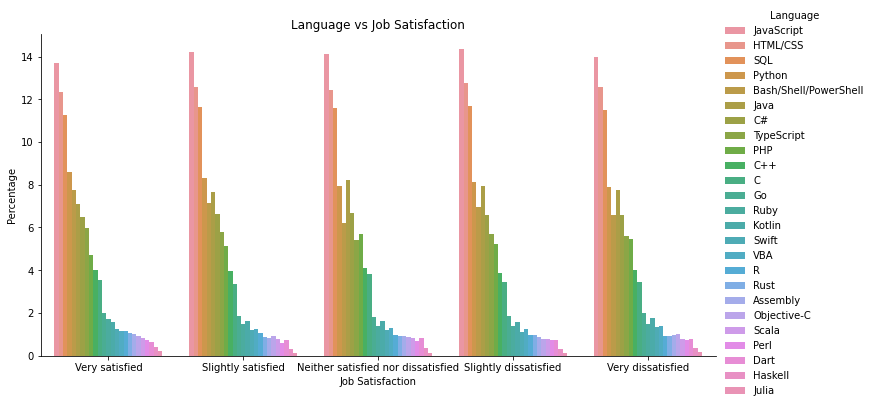

In [26]:
plot_cat("job_sat", "language_worked_with", df, title="Language vs Job Satisfaction", label="Language");

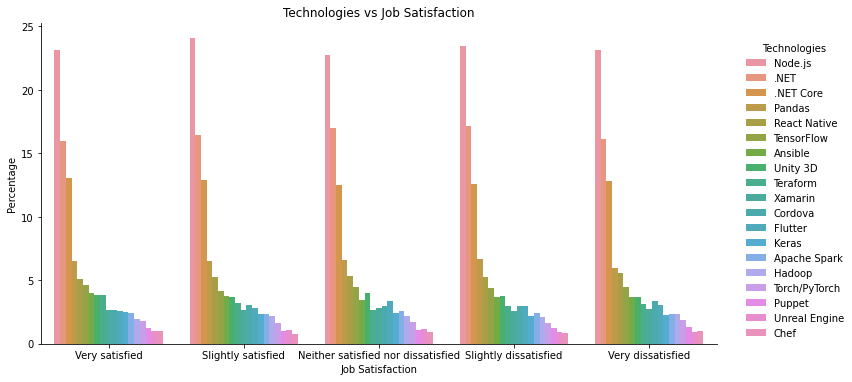

In [27]:
plot_cat("job_sat", "misc_tech_worked_with", df, title="Technologies vs Job Satisfaction", label="Technologies")

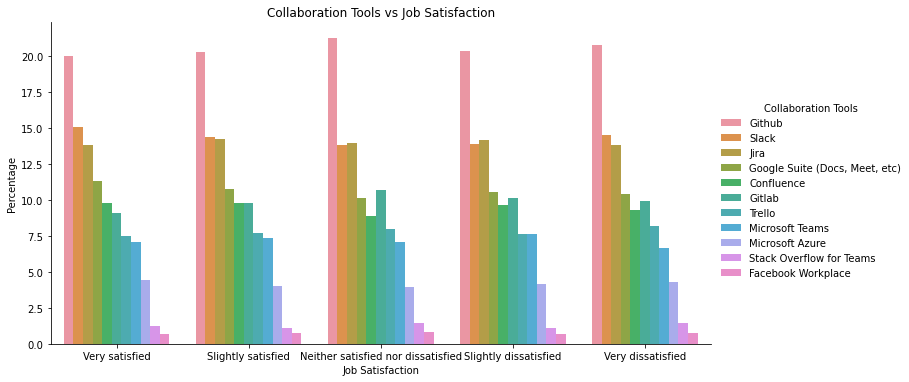

In [28]:
plot_cat("job_sat", "new_collab_tools_worked_with", df, title="Collaboration Tools vs Job Satisfaction", label="Collaboration Tools")

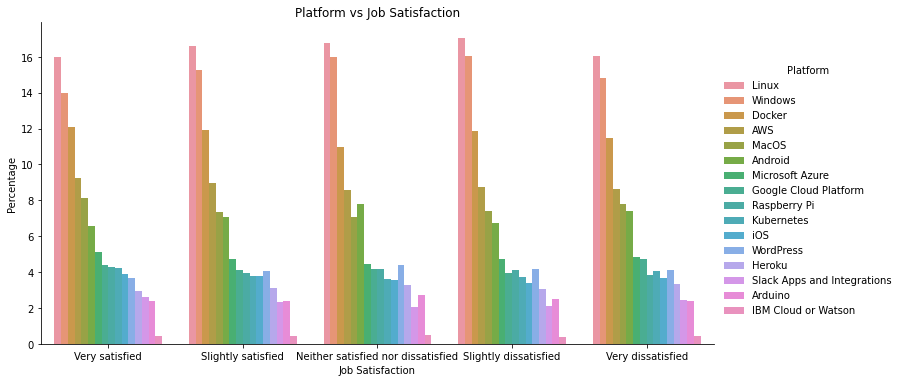

In [29]:
plot_cat("job_sat", "platform_worked_with", df, title="Platform vs Job Satisfaction", label="Platform")

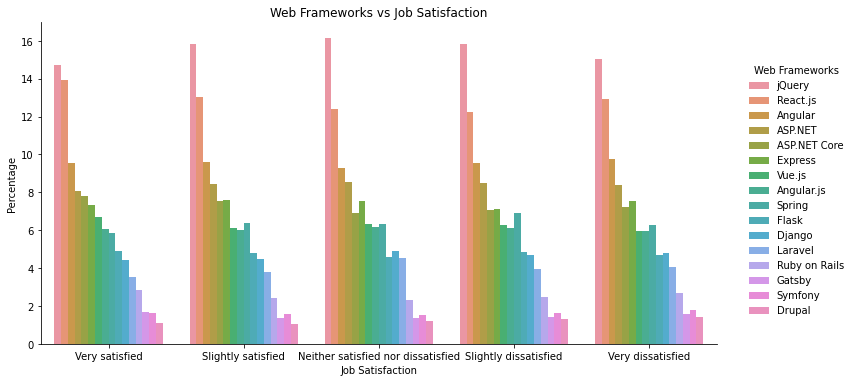

In [30]:
plot_cat("job_sat", "webframe_worked_with", df, title="Web Frameworks vs Job Satisfaction", label="Web Frameworks")

> Regardless of languages/frameworks/technologies either, respondents are scattered with the same pattern across different satisfaction level.

## Q3: What other hidden factors affects job satisfaction?

**Explore All Important Fields**

In [31]:
X, y = clean_data(df)

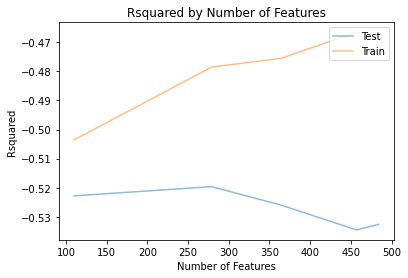

In [32]:
cutoffs = [1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_mod(X, y, cutoffs)

In [33]:
coef_df = coef_weights(lm_model.coef_[0], X_train)

coef_df.head(20)

,est_int,coefs,abs_coefs
173,new_onboard_good_Yes,0.813403,0.813403
46,country_Finland,0.602361,0.602361
34,country_Belgium,0.580067,0.580067
87,country_United States,0.572628,0.572628
81,country_Sweden,0.527928,0.527928
43,country_Denmark,0.525507,0.525507
248,years_code_Less than 1 year,-0.512480,0.512480
64,country_New Zealand,0.503502,0.503502
78,country_South Korea,0.497203,0.497203
190,purchase_what_I have little or no influence,-0.477791,0.477791


> Suprisingly, having a good onboarding process gives a positive job satisfaction
>
> Of course, based on the country you are in can greatly influence job satisfaction

## Evaluation

**What do the developers look for a company?**

* Top 5 the developers value more
  * Languages/Frameworks/Technologies
  * Office Environment/Culture
  * Flexible Schedule
  * Opportunities and professional Development

* Top 5 drivers in looking for new job
  * Better compensation
  * New technologies
  * Opportunities
  * Growth and Leadership
  * Better work/life balance

  We can summarize both that compensation and technologies are the 2 most important things that developers look for a company.

**Is salary or languages/technologies/frameworks effective enough to solve job satisfaction issues?**

Short answer No. Even with good compensation or working on new technologies, they are the same across different job satisfaction. We may need to look at other things developers values more.

**What other hidden factors affects job satisfaction?**

* Good onboarding process tops the list
* The rest are mostly top countries that inclines more in job satisfaction. These are Finland, Belgium, United States, Sweden and Denmark.